In [37]:
# install latest version of scikit-learn
# %pip install -U scikit-learn
# or
# !pip install -U scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the data
housing = pd.read_csv('https://raw.githubusercontent.com/thomouvic/SENG474/main/data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


# Data Structure

In [40]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [41]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [42]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

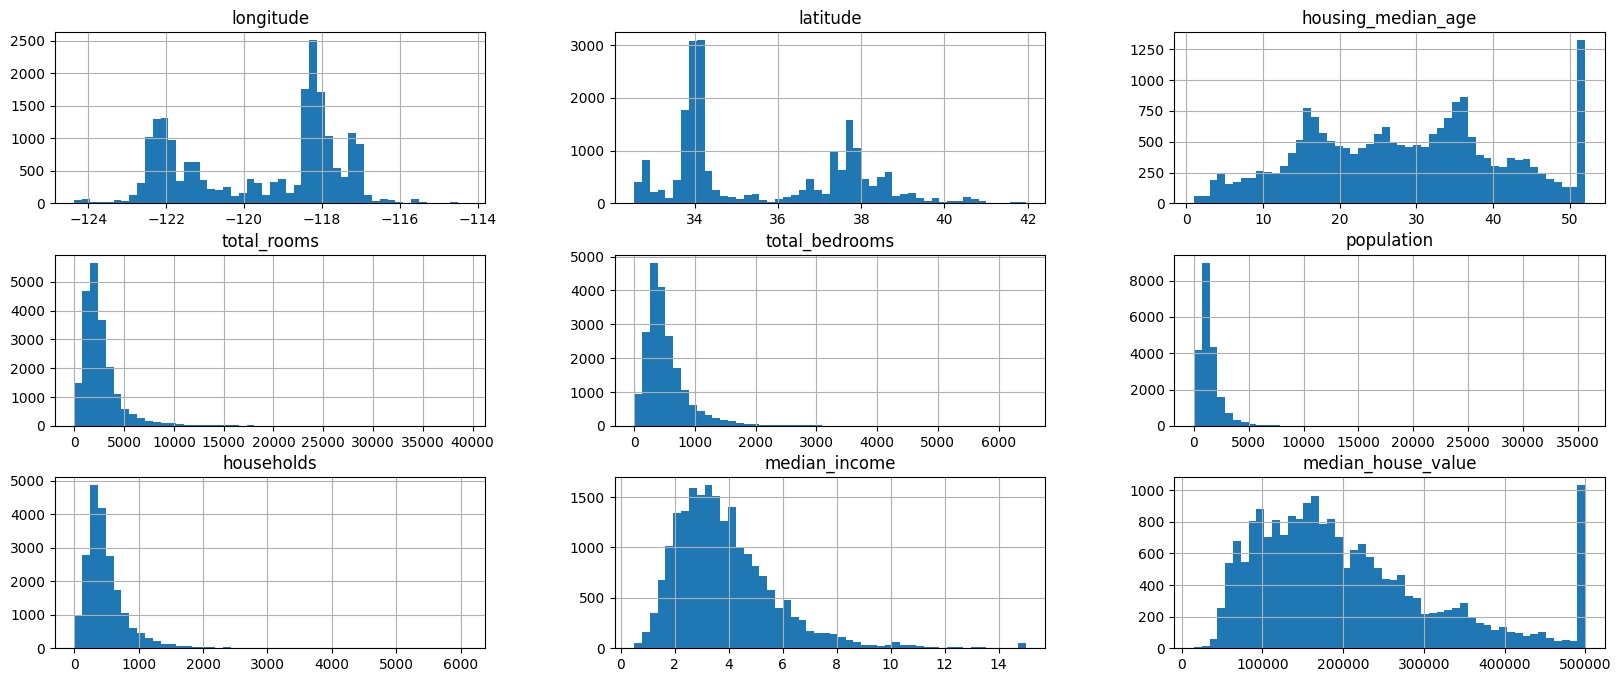

In [43]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html#pandas.DataFrame.hist
housing.hist(bins=50, figsize=(20,8))

# Create Test Set

In [44]:
# using scikit-learn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
len(train_set), len(test_set)

(16512, 4128)

### Income Category Analysis

The following code performs two main operations on the `housing` DataFrame:

1. **Categorization of Income Levels:**
   - Utilizes `pd.cut()` to create a new column `"income_cat"` in the DataFrame.
   - This function segments the `"median_income"` values into five distinct categories based on specified income ranges.
   - The bins are defined as `[0., 1.5, 3.0, 4.5, 6., np.inf]`, grouping incomes into ranges: 0-1.5 (category 1), 1.5-3.0 (category 2), etc., with the last category capturing all incomes above 6.

2. **Visualization of Income Categories:**
   - A bar plot is generated to visualize the distribution of these income categories.
   - `value_counts().sort_index().plot(kind='bar')` creates a bar chart showing the frequency of each income category.
   - This visualization aids in understanding the spread of different income categories within the housing data.


Text(0, 0.5, 'Count')

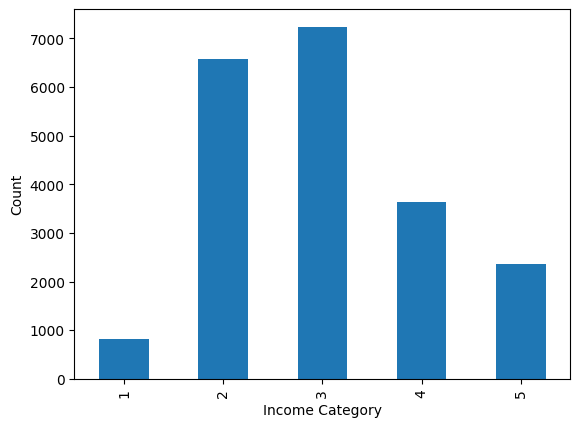

In [45]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Income Category")
plt.ylabel("Count")

In [46]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2,
    random_state=42,
    stratify=housing["income_cat"])

len(strat_train_set), len(strat_test_set)

(16512, 4128)

In [47]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [48]:
# Percentages of each category in the entire / training / testing data sets
print(housing["income_cat"].value_counts() / len(housing))
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))
print(test_set["income_cat"].value_counts() / len(test_set))

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64
income_cat
3    0.345203
2    0.307413
4    0.184109
5    0.120882
1    0.042393
Name: count, dtype: float64


In [49]:
#drop income_cat
strat_train_set = strat_train_set.drop("income_cat", axis=1)
strat_test_set = strat_test_set.drop("income_cat", axis=1)


In [50]:
housing = strat_train_set.copy()

# Explore and Visualize Data

<Axes: xlabel='longitude', ylabel='latitude'>

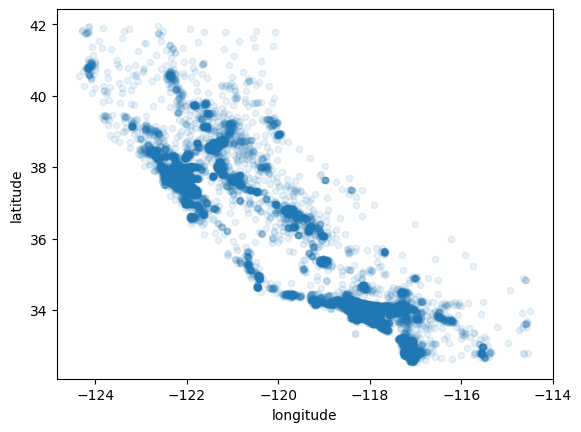

In [51]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

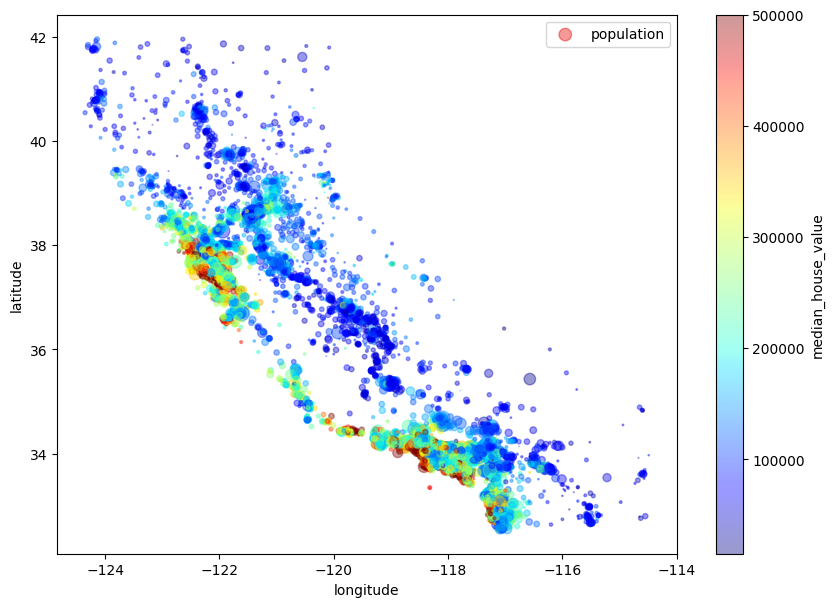

In [52]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100,
             label="population",
             figsize=(10,7),
             c="median_house_value",
             cmap=plt.get_cmap("jet"), colorbar=True)

In [53]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html#pandas.DataFrame.corr
housing.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


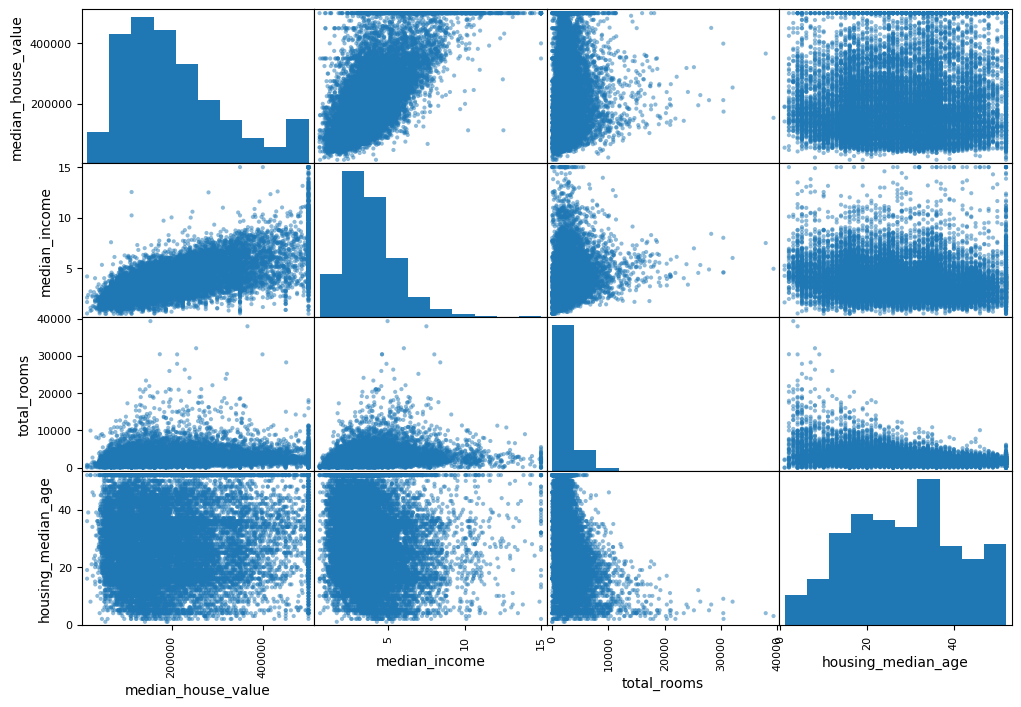

In [54]:
# https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html#pandas.plotting.scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

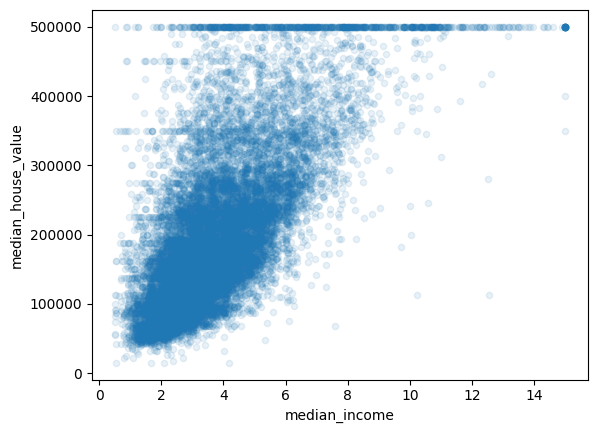

In [55]:
# Look at one in particular
housing.plot(kind="scatter", x="median_income",
             y="median_house_value", alpha=0.1)

# STUDENT SECTION

In [9]:
# Load the data set and print the first 5 entries
from sklearn.datasets import load_diabetes
data = load_diabetes(as_frame=True, scaled = False)
diabetes = data['frame']

# Print the head of the data frame
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


# Data Structure

In [10]:
# Print info about the data frame
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [11]:
# Get the value counts for the sex attribute
diabetes["sex"].value_counts()

sex
1.0    235
2.0    207
Name: count, dtype: int64

In [12]:
# Describe the attributes
diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'bp'}>, <Axes: title={'center': 's1'}>,
        <Axes: title={'center': 's2'}>],
       [<Axes: title={'center': 's3'}>, <Axes: title={'center': 's4'}>,
        <Axes: title={'center': 's5'}>],
       [<Axes: title={'center': 's6'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

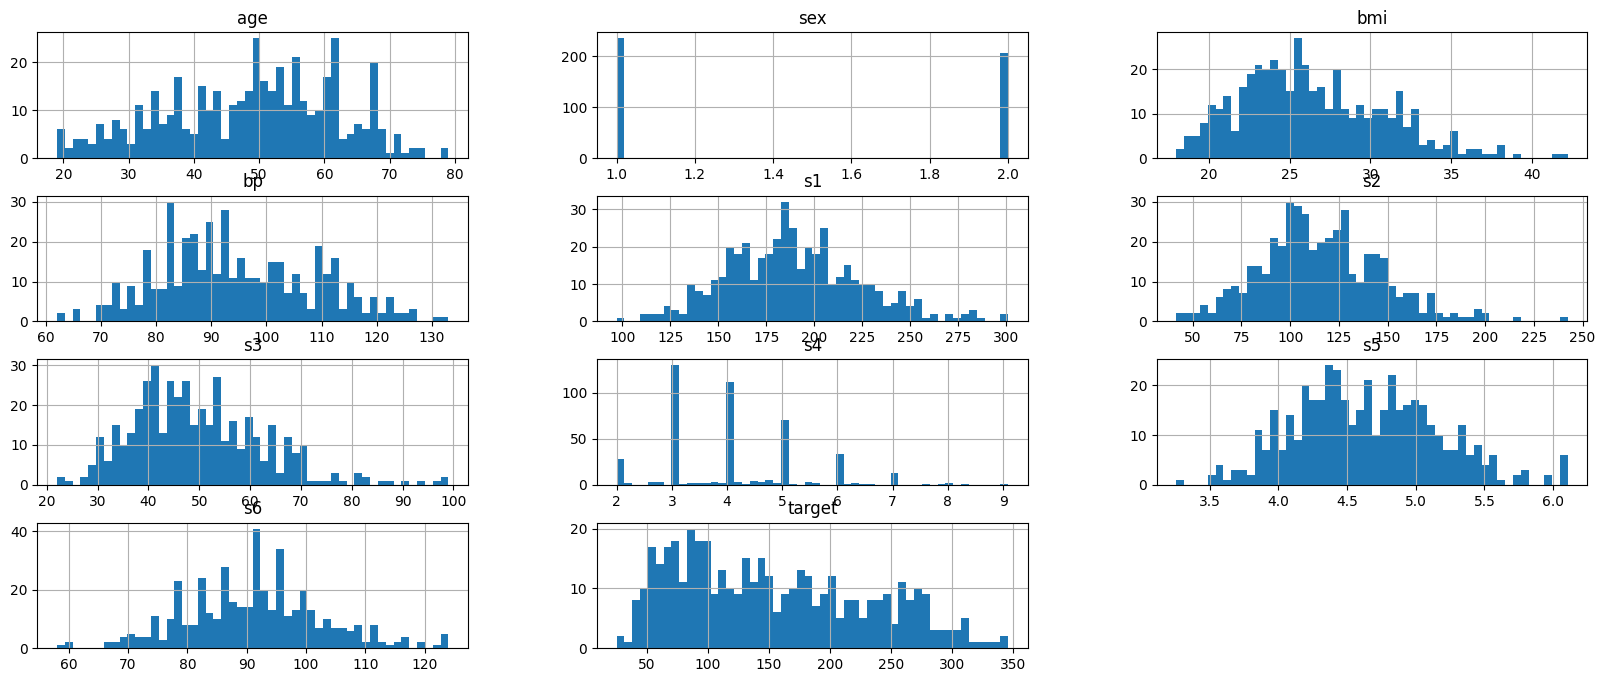

In [16]:
# Plot histograms for the attributes
diabetes.hist(bins=50, figsize=(20,8))
#bins changes number of columns
#figsize is width, height

# Create Test Set

In [19]:
# using scikit-learn
from sklearn.model_selection import train_test_split

# Split the data into train and test sets with a test size of 0.2 and random state of 42
train_set, test_set = train_test_split(diabetes, test_size=0.2, random_state=42)

# Print the length of both afterwards
len(train_set), len(test_set)

(353, 89)

### BMI Analysis

The following code performs two main operations on the `diabetes` DataFrame:

1. **Categorization of BMI Levels:**
   - Utilizes `pd.cut()` to create a new column `"bmi_cat"` in the DataFrame.
   - This function segments the `"bmi"` values into four distinct categories based on specified income ranges.
   - The bins are defined as `[0., 18.5, 25., 30., np.inf]`, grouping bmi into ranges: 0-18.5 (category 1 [underweight]), 18.5-25 (category 2 [Healthy Weight]), 25-30 (category 3 [Overweight]), with the last category capturing all incomes above 30 (category 4 [Obesity]).

   Categories chosen from https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

2. **Visualization of BMI Categories:**
   - A bar plot is generated to visualize the distribution of these income categories.
   - `value_counts().sort_index().plot(kind='bar')` creates a bar chart showing the frequency of each BMI category.
   - This visualization aids in understanding the spread of different BMI categories within the diabetes data.

Note: BMI was designed as a metric for European men and has a checkered past.


Text(0, 0.5, 'Count')

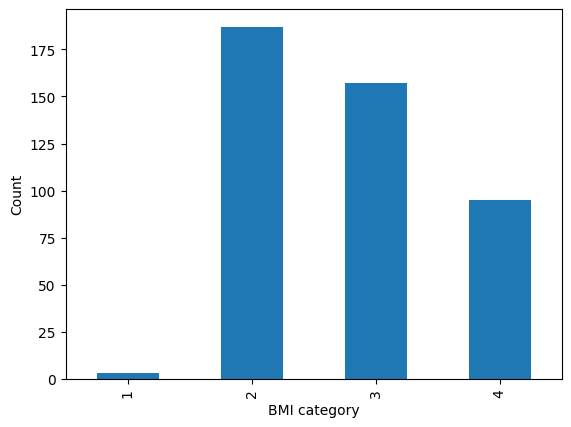

In [43]:
# See above for explantion of what to fill in here
diabetes["bmi_cat"] = pd.cut(diabetes["bmi"],
                             bins=[0., 18.5, 25, 30, np.inf],
                             labels=[1, 2, 3, 4])

diabetes["bmi_cat"].value_counts().sort_index().plot(kind='bar')
plt.xlabel("BMI category")
plt.ylabel("Count")

In [44]:
# Make the same stratified train and test sets with random_state = 42 and test_size = 0.2
strat_train_set, strat_test_set = train_test_split(diabetes,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   stratify=diabetes["bmi_cat"])

# Print the lenghts of the train and test sets
len(strat_train_set), len(strat_test_set)

(353, 89)

In [45]:
# Make the regular train and test sets with random state equal to 42
train_set, test_set = train_test_split(diabetes, test_size=0.2, random_state=42)

In [46]:
# Print the percentages of each category in the entire / training / testing data sets
# percent of each bmi_index in the set diabetes
print(diabetes["bmi_cat"].value_counts() / len(diabetes))
# 42% of values have index 2, 35% have index 3, and so on
print()

# same for strat_test_set
print(strat_test_set["bmi_cat"].value_counts() / len(strat_test_set))
print()

# same for test_set
print(test_set["bmi_cat"].value_counts() / len(test_set))


bmi_cat
2    0.423077
3    0.355204
4    0.214932
1    0.006787
Name: count, dtype: float64

bmi_cat
2    0.426966
3    0.359551
4    0.213483
1    0.000000
Name: count, dtype: float64

bmi_cat
2    0.505618
3    0.280899
4    0.191011
1    0.022472
Name: count, dtype: float64


In [48]:
# drop bmi_cat
strat_train_set = strat_train_set.drop("bmi_cat", axis = 1)
strat_test_set = strat_test_set.drop("bmi_cat", axis = 1)


In [49]:
# Make a copy of the data frame to put things back to normal
diabetes = strat_train_set.copy()

# Explore and Visualize Data

<Axes: xlabel='age', ylabel='bmi'>

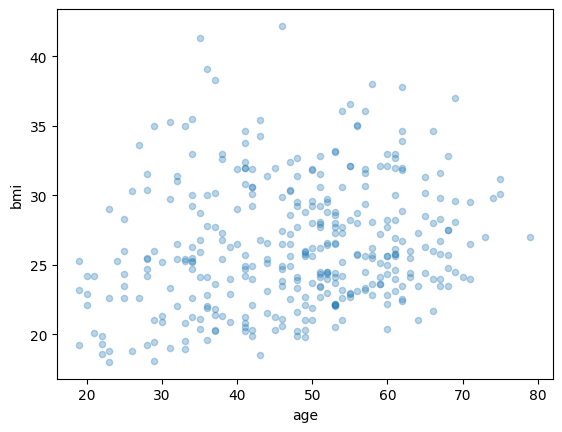

In [56]:
# Make a scatter plot with x = "age", y = "bmi"
diabetes.plot(kind="scatter", x="age", y="bmi", alpha=0.3)

<Axes: xlabel='age', ylabel='bmi'>

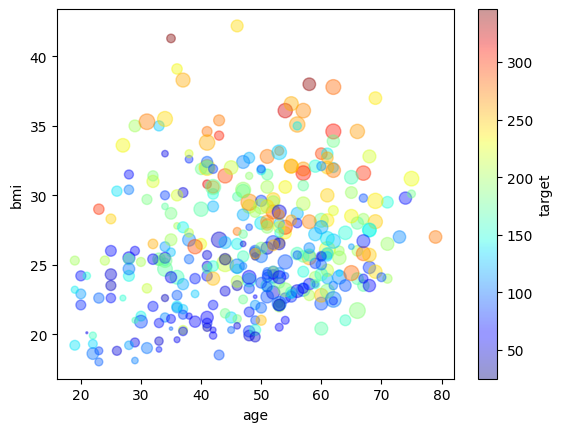

In [65]:
# Calculate the minimum blood pressure value from the dataset 
min_bp = min(diabetes["bp"])
min_bp

# Create a scatter plot of the diabetes dataset
# x-axis represents 'age' and y-axis represents 'bmi' of the patients
# The size of each point ('s') is proportional to the difference between the patient's blood pressure and the minimum blood pressure in the dataset, multiplied by 2 for better visibility
# 'c' is set to 'target' to color the points based on the diabetes progression target value
# Includes a color bar to interpret the target values
diabetes.plot(kind="scatter",
              x="age",
              y="bmi",
              alpha=0.4,
              s= 2 * (diabetes["bp"]-min_bp),
              c="target",
              cmap=plt.get_cmap("jet"), colorbar=True)

In [66]:
# Print the pairwise correlation between attributes
diabetes.corr(numeric_only=True)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.137609,0.201968,0.358211,0.286431,0.211254,-0.051958,0.197048,0.318855,0.300287,0.207121
sex,0.137609,1.000000,0.092030,0.261274,0.031272,0.139467,-0.397392,0.338622,0.176956,0.182519,0.072152
bmi,0.201968,0.092030,1.000000,0.376366,0.238896,0.250718,-0.359905,0.405818,0.430599,0.381137,0.563074
bp,0.358211,0.261274,0.376366,1.000000,0.236104,0.173787,-0.210933,0.276538,0.422766,0.385991,0.445400
s1,0.286431,0.031272,0.238896,0.236104,1.000000,0.885400,0.066992,0.524875,0.513310,0.345714,0.218777
s2,0.211254,0.139467,0.250718,0.173787,0.885400,1.000000,-0.181364,0.641276,0.292538,0.291952,0.177050
s3,-0.051958,-0.397392,-0.359905,-0.210933,0.066992,-0.181364,1.000000,-0.739373,-0.395026,-0.264123,-0.399414
s4,0.197048,0.338622,0.405818,0.276538,0.524875,0.641276,-0.739373,1.000000,0.604807,0.411903,0.442640
s5,0.318855,0.176956,0.430599,0.422766,0.513310,0.292538,-0.395026,0.604807,1.000000,0.497453,0.563439
s6,0.300287,0.182519,0.381137,0.385991,0.345714,0.291952,-0.264123,0.411903,0.497453,1.000000,0.395441


array([[<Axes: xlabel='s1', ylabel='s1'>,
        <Axes: xlabel='s2', ylabel='s1'>,
        <Axes: xlabel='s3', ylabel='s1'>,
        <Axes: xlabel='s4', ylabel='s1'>,
        <Axes: xlabel='s5', ylabel='s1'>,
        <Axes: xlabel='s6', ylabel='s1'>],
       [<Axes: xlabel='s1', ylabel='s2'>,
        <Axes: xlabel='s2', ylabel='s2'>,
        <Axes: xlabel='s3', ylabel='s2'>,
        <Axes: xlabel='s4', ylabel='s2'>,
        <Axes: xlabel='s5', ylabel='s2'>,
        <Axes: xlabel='s6', ylabel='s2'>],
       [<Axes: xlabel='s1', ylabel='s3'>,
        <Axes: xlabel='s2', ylabel='s3'>,
        <Axes: xlabel='s3', ylabel='s3'>,
        <Axes: xlabel='s4', ylabel='s3'>,
        <Axes: xlabel='s5', ylabel='s3'>,
        <Axes: xlabel='s6', ylabel='s3'>],
       [<Axes: xlabel='s1', ylabel='s4'>,
        <Axes: xlabel='s2', ylabel='s4'>,
        <Axes: xlabel='s3', ylabel='s4'>,
        <Axes: xlabel='s4', ylabel='s4'>,
        <Axes: xlabel='s5', ylabel='s4'>,
        <Axes: xlabel='s6', yla

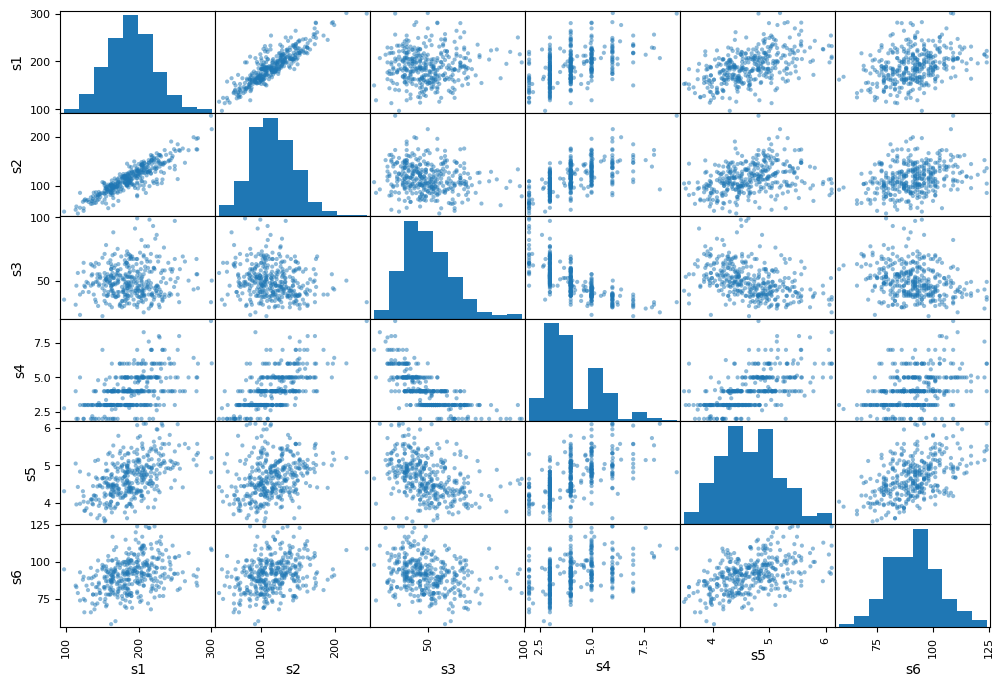

In [67]:
# Make a scatter matrix for attributes ['s1','s2','s3','s4','s5','s6']
attributes=["s1", "s2", "s3", "s4", "s5", "s6"]
pd.plotting.scatter_matrix(diabetes[attributes], figsize=(12,8))


<Axes: xlabel='s1', ylabel='s2'>

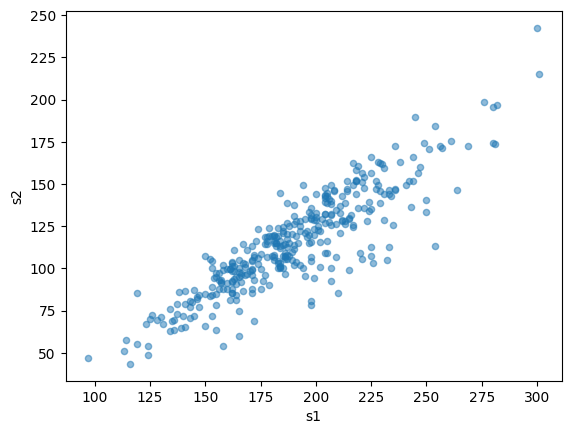

In [70]:
# Individually plot the s1 / s2 scatter plot
diabetes.plot(kind="scatter", x="s1", y="s2", alpha = 0.5)